<a href="https://colab.research.google.com/github/np03cs4a240102-lang/Concepts-and-Technologies-of-AI/blob/main/Worksheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


# Load dataset
df = pd.read_csv('/content/drive/MyDrive/AI Workshop/diabetes_.csv')


# Display first rows
df.head()

# Dataset info and summary statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
  df[col] = df[col].replace(0, df[col].median())

In [ ]:
# Separate features and target
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values


# Train-test split from scratch
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.7 * len(X))


train_idx, test_idx = indices[:split], indices[split:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [ ]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
def knn_predict_single(x, X_train, y_train, k):
    distances = [(euclidean_distance(x, X_train[i]), y_train[i])
                 for i in range(len(X_train))]

    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]
    labels = [label for _, label in k_neighbors]

    return max(set(labels), key=labels.count)


In [ ]:
def knn_predict(X_test, X_train, y_train, k):
  return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

In [ ]:
def accuracy(y_true, y_pred):
  return np.mean(y_true == y_pred)

k = 5
y_pred = knn_predict(X_test, X_train, y_train, k)
acc_original = accuracy(y_test, y_pred)
acc_original

np.float64(0.7359307359307359)

Problem 2

In [ ]:
def standardize(X_train, X_test):
  mean = X_train.mean(axis=0)
  std = X_train.std(axis=0)
  return (X_train - mean) / std, (X_test - mean) / std

X_train_scaled, X_test_scaled = standardize(X_train, X_test)

y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k)
acc_scaled = accuracy(y_test, y_pred_scaled)
acc_scaled

np.float64(0.7619047619047619)

Problem 3

In [ ]:
k_values = range(1, 16)

acc_original_list = []
acc_scaled_list = []

time_original = []
time_scaled = []

for k in k_values:

    # -------- ORIGINAL DATA --------
    start = time.time()
    y_pred = knn_predict(X_test, X_train, y_train, k)
    time_original.append(time.time() - start)
    acc_original_list.append(accuracy(y_test, y_pred))

    # -------- SCALED DATA --------
    start = time.time()
    y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k)
    time_scaled.append(time.time() - start)
    acc_scaled_list.append(accuracy(y_test, y_pred_scaled))


In [ ]:
print(len(k_values))
print(len(acc_original_list))
print(len(acc_scaled_list))
print(len(time_original))
print(len(time_scaled))


15
15
15
15
15


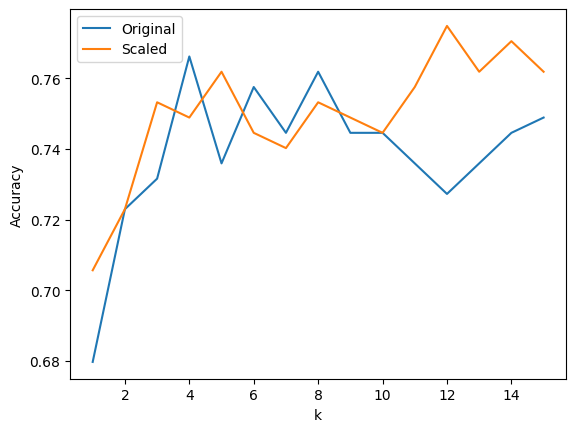

In [ ]:
plt.figure()
plt.plot(k_values, acc_original_list, label='Original')
plt.plot(k_values, acc_scaled_list, label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


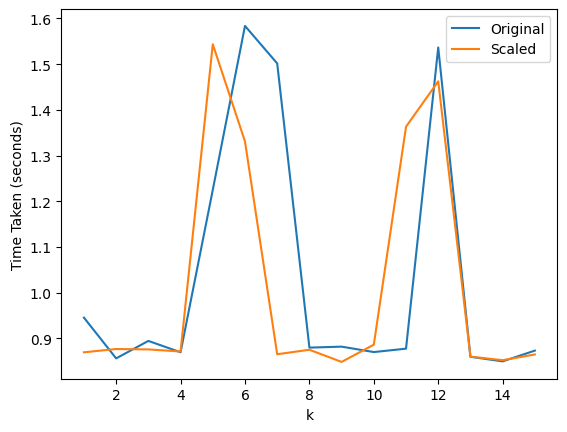

In [ ]:
plt.figure()
plt.plot(k_values, time_original, label='Original')
plt.plot(k_values, time_scaled, label='Scaled')
plt.xlabel('k')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.show()


Problem 4


#Challenges of KNN

1. High computational cost for large datasets.

2. Memory intensive (stores entire training set).

3. Performance degrades in high-dimensional spaces (curse of dimensionality).

# Strategies to Improve Efficiency

1. Use KD-Trees / Ball Trees.

2. Apply Approximate Nearest Neighbors (ANN).

3. Perform Dimensionality Reduction (PCA).

4. Reduce dataset size using sampling or clustering.